# Introduction 
Ce projet consiste à implementer un portfeuille avec 10 actifs les actifs sont 
#tableau : 
## Choix des actifs : 
Pour les économistes et les analystes financiers, les cours boursiers sont avant tout
influencés par les informations issues du monde réel, à savoir les résultats des
entreprises, la croissance économique, les conditions météorologiques, les conflits
géopolitiques, etc. Toutes ces raisons sont louables et doivent être prises en compte par
le trader ou l’investisseur. Néanmoins, pour l’analyste technique, l’information la plus
importante est fournie par les cours boursiers. Car, au final, peut-on réellement
considérer une nouvelle comme positive si le marché ne progresse pas ? La réponse est
bien évidemment non. Ce qui fait bouger les marchés, c’est avant tout la confrontation
entre les « offreurs » et les « demandeurs ». Cette confrontation perpétuelle est à
l’origine de la formation des cours boursiers. Lorsque les acheteurs ont la main, les
cours boursiers ont tendance à progresser. Inversement, lorsque le pessimisme règne, ce
sont les vendeurs qui maîtrisent la situation et les cours boursiers déclinent.
</br> donc pour les choix de ces actifs nous avons implémenter et appliquer les methodes de l'analyses techniques, plus le ressenti du marché exterrieur. 
## Analyse technique : 
### FSCM Pfizer: 



## Vision sur notre portfeuille 


In [187]:
# Data loading : 
import alpha_vantage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from alpha_vantage.timeseries import TimeSeries
#ts = TimeSeries(key='IWVCPPHPKILWRYGB', output_format='pandas')
ts = TimeSeries(key='J4AG1THDI63XH963', output_format='pandas')

In [188]:
stocks = ['FCFS','XEL','AMD','PFE']
initial_weight 

returns = pd.DataFrame({})
for s in stocks: #portfolio_composition:
  data, meta_data = ts.get_daily_adjusted(symbol=s)
  data['return_%s' % (s)] = data['4. close'].pct_change(1)
  returns = returns.join(data[['return_%s' % (s)]],how="outer").dropna()
returns

,return_FCFS,return_XEL,return_AMD,return_PFE
date,,,,
2020-10-23,0.031016,-0.003069,-0.003283,0.006857
2020-10-26,0.006981,-0.008848,0.042470,0.013091
2020-10-27,0.025627,0.029462,0.032461,0.055853
2020-10-28,0.019205,-0.006785,-0.020764,0.004819
2020-10-29,0.000576,0.010139,0.036260,-0.005637
...,...,...,...,...
2021-03-11,0.007668,-0.003544,0.002221,-0.006583
2021-03-12,-0.003348,-0.015697,-0.017576,-0.013273
2021-03-15,-0.004204,-0.005362,-0.003021,-0.011722


<AxesSubplot:xlabel='date'>

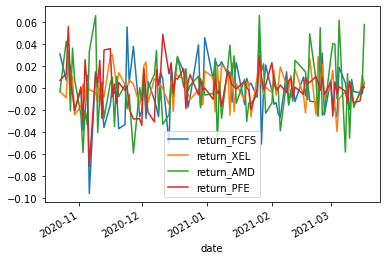

In [189]:
returns.plot()

In [190]:
daily_returns_portfolio_mean = returns.mean()
daily_returns_portfolio_mean

return_FCFS   -0.001755
return_XEL     0.001475
return_AMD     0.000845
return_PFE     0.000807
dtype: float64

### Matrice de covariance : 
à utiliser dans le modèl markowitz pour trouer la meilleure rpéartition du portfeuille ! 

In [191]:

def constraint1(X):
    sum = 1
    for i in range(1,X.size):
        sum = sum - X[i]  
    return sum

def constraint2(X):
    sum = 0
    for i in range(1,X.size):
        sum += X[i]*daily_returns_portfolio_mean[i]      
    return sum - RendementVise

def minimizationfunction(x):
    somme=0
    for i in range(len(x)):
        for j in range(len(x)): 
            somme += MatCov.values[i,j]*x[j]*x[i]
    return somme
        
def minimizing(taille):
    cons = ({'type': 'eq', 'fun': constraint1 },
            {'type': 'ineq', 'fun': constraint2 })
    x=np.ones(taille)
    bounds = []
    for i in range(taille): 
        bounds.append((0.0001,None))

    result = minimize(minimizationfunction, x,   options={'verbose': 1}, bounds=bounds, method='trust-constr',constraints=cons )
    solutions = result.x
    print(solutions)
    return solutions


## Application du modèl markowitz sur notre portfeuille 
Dans cette partie nous avons appliqué le modèl markowitz sur notre portfeuille, Nous avons calculé la matrice des covariances apartir de l'historique des rendements. Ensuite, nous avons calculé la moyenne des rendemnts des actifs. Pour finalement, passer ces parametres a notres modél markowitz que j'ai implementé pour avoirla meilleure répartition des fraction d'actif avec une variance minimal 

In [192]:
def markowitz(RendementVise,taille):
    RendementVise=RendementVise
    return minimizing(taille)
MatCov = returns.cov()
RendementVise=0.0009   
initial_weight = markowitz(RendementVise,4)

print("\n\n\nles fractions d'actifs sont:" , initial_weight)

`gtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 90, CG iterations: 23, optimality: 7.30e-09, constraint violation: 2.22e-16, execution time:  0.1 s.
[0.00273161 0.5265409  0.14977458 0.32368452]



les fractions d'actifs sont: [0.00273161 0.5265409  0.14977458 0.32368452]


c:\users\hamro\pycharmprojects\actions_simulation\venv\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


## Rendement total du portfeuille : 


In [193]:
allocated_daily_returns = (initial_weight * daily_returns_portfolio_mean)
portfolio_return = np.sum(allocated_daily_returns)
portfolio_return

0.00115954952156444

In [194]:
Cumulative_returns_daily = (1+returns).cumprod() -1
Cumulative_returns_daily


,return_FCFS,return_XEL,return_AMD,return_PFE
date,,,,
2020-10-23,0.031016,-0.003069,-0.003283,0.006857
2020-10-26,0.038214,-0.011890,0.039047,0.020037
2020-10-27,0.064820,0.017222,0.072775,0.077010
2020-10-28,0.085270,0.010319,0.050500,0.082200
2020-10-29,0.085895,0.020563,0.088591,0.076099
...,...,...,...,...
2021-03-11,-0.174675,0.151256,0.011228,0.092730
2021-03-12,-0.177438,0.133185,-0.006545,0.078226
2021-03-15,-0.180896,0.127109,-0.009547,0.065587


<AxesSubplot:xlabel='date'>

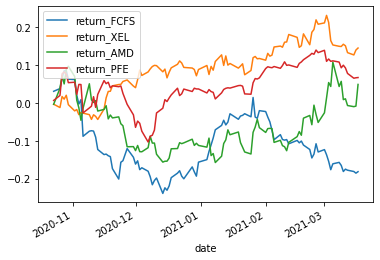

In [195]:
Cumulative_returns_daily.plot()

### Daily portfolio portfolio return


<AxesSubplot:xlabel='date'>

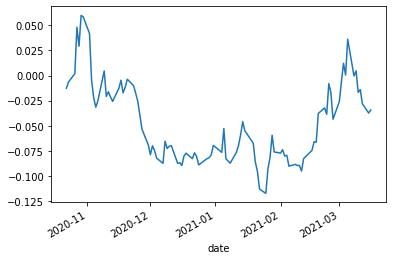

In [196]:
Cumulative_portfolio_returns_daily = (1+portfolio_daily_returns).cumprod()-1
Cumulative_portfolio_returns_daily
Cumulative_portfolio_returns_daily.plot()

## Le portfeuille benchmark : 


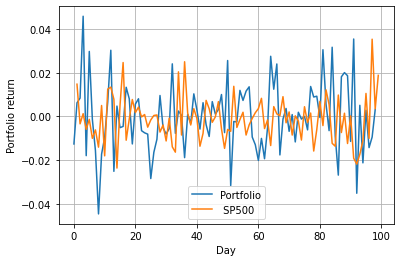

In [199]:
data, meta_data = ts.get_daily_adjusted(symbol='SPY')
spy_return = data['4. close'].pct_change(1)

import numpy as np
x = range(len(portfolio_daily_returns))
pr = portfolio_daily_returns
#plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(x,pr,label="Portfolio")
plt.plot(range(len(spy_return)),spy_return,label=" SP500")

plt.xlabel("Day")
plt.ylabel("Portfolio return")

plt.grid()
plt.legend()

plt.show()

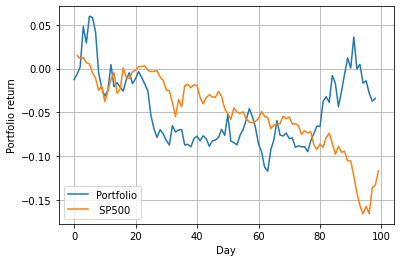

In [200]:
spy_cum = (1+spy_return).cumprod()-1
prc =  (1+portfolio_daily_returns).cumprod()-1
x = range(len(prc))
#x = range(spy_cum)
#plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(x,prc,label="Portfolio")
plt.plot(range(len(spy_cum)),spy_cum,label=" SP500")

plt.xlabel("Day")
plt.ylabel("Portfolio return")

plt.grid()
plt.legend()

plt.show()

### Sharpe Ratio

In [ ]:
Sharpe_Ratio = portfolio_return / portfolio_daily_returns.std()
Sharpe_Ratio

### Methodes d'extraction des monnaie de change

In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange
cc = ForeignExchange(key='IWVCPPHPKILWRYGB',output_format='pandas')
# There is no metadata in this call
data, meta_data = cc.get_currency_exchange_intraday('EUR', 'USD', '5min', 'full')
EurUsd_change = data['4. close'].pct_change(1)
EurUsd_change.plot()

plt.title('Daily close value for usd ')
plt.grid()
plt.show()